Inicialização

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
le = LabelEncoder()

In [3]:
df = pd.read_csv("full_bus_df.csv", low_memory=False)

In [4]:
df['DataIni'] = pd.to_datetime(df['DataIni'])
df['HoraIni'] = pd.to_datetime(df['HoraIni']).dt.time

df['DataHoraIni'] = pd.to_datetime(df['DataIni'].astype(str) + ' ' + df['HoraIni'].astype(str))

df['DiaDaSemana'] = df['DataHoraIni'].dt.day_name(locale='pt_BR.utf8')

def get_part_of_day(hour):
    if (hour > 4) and (hour <= 8):
        return "Manhã"
    elif (hour > 8) and (hour <= 12 ):
        return "Final da Manhã"
    elif (hour > 12) and (hour <= 16):
        return "Tarde"
    elif (hour > 16) and (hour <= 20) :
        return "Final da Tarde"
    elif (hour > 20) and (hour <= 24):
        return "Noite"
    elif (hour <= 4):
        return "Madrugada"

# Adicionar a coluna 'HoraDia', que indica a hora do dia
df['HorarioDia'] = df['DataHoraIni'].dt.hour.apply(get_part_of_day)

C:\Users\eddar\AppData\Local\Temp\ipykernel_20388\707555294.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HoraIni'] = pd.to_datetime(df['HoraIni']).dt.time


In [5]:
le = LabelEncoder()
df["DiaDaSemana"] = le.fit_transform(df["DiaDaSemana"])
df["HorarioDia"] = le.fit_transform(df["HorarioDia"])
df["DataHoraIni"] = le.fit_transform(df["DataHoraIni"])
df["Sentido"] = le.fit_transform(df["Sentido"])
df["Linha"] = le.fit_transform(df["Linha"])

df["DuraçãoViagem"] = pd.to_timedelta(df["DuraçãoViagem"])
df["TempoViagemMinutos"] = df["DuraçãoViagem"].dt.total_seconds() / 60
df.drop("DuraçãoViagem", axis=1, inplace=True)
df = df[['DiaDaSemana', 'HorarioDia', 'DataHoraIni', 'Sentido', 'Linha', 'TempoViagemMinutos', 'TotalGiros']]

In [6]:
sample_df = df.sample(frac=0.1, random_state=42)

In [7]:
X = sample_df.drop("TotalGiros", axis=1)
y = sample_df["TotalGiros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
models = [
    RandomForestRegressor(), 
    LinearRegression(), 
    Ridge(alpha=1.0), 
    Lasso(alpha=1.0), 
    ElasticNet(alpha=1.0, l1_ratio=0.5), 
    DecisionTreeRegressor(), 
    GradientBoostingRegressor(), 
    SVR(), 
    KNeighborsRegressor(), 
    MLPRegressor(max_iter=10000) 
]


In [9]:
model_names = []
rmse_values = []

for m in models:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    model_names.append(model.__class__.__name__)
    rmse_values.append(rmse)


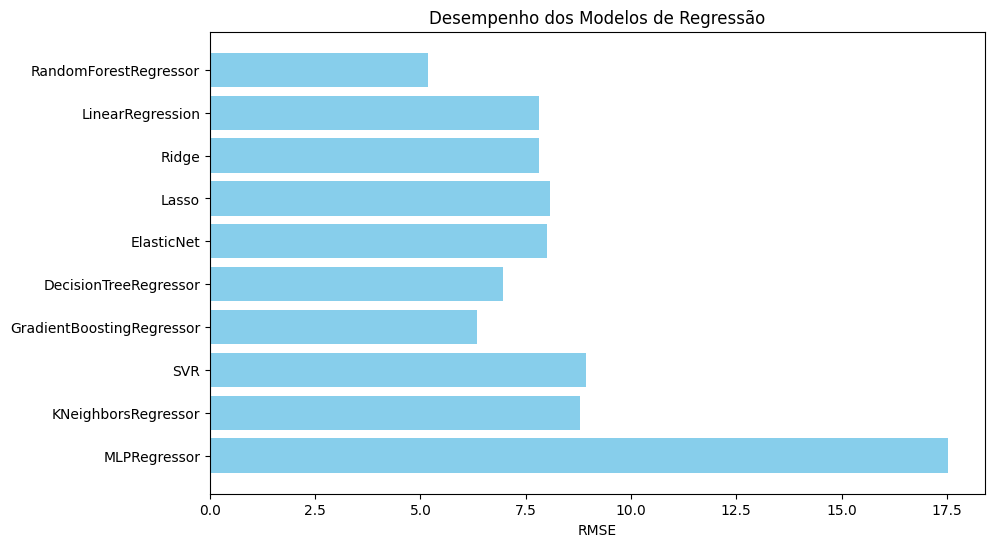

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('Desempenho dos Modelos de Regressão')
plt.gca().invert_yaxis()
plt.show()